In [27]:
from PyAudit.basics import missing_rate, zero_rate, dtypes_class
from PyAudit.basics import feature_variance, freq_items_df, feature_len
from PyAudit.basics import corr_matrix,numeric_summary, category_summary

import pandas as pd
import os, sys

In [28]:
output = os.path.abspath(os.path.join(sys.path[0])) + '/output'
print(output)

/Users/dt216661/spark/python/output


In [2]:
pd.__version__

'0.24.1'

In [29]:
d = {'A': [1, 0, None, 3],
     'B': [1, 0, 0, 0],
     'C': ['a', None, 'c', 'd']}

# create DataFrame
df = pd.DataFrame(d)
df

,A,B,C
0,1.0,1,a
1,0.0,0,None
2,NaN,0,c
3,3.0,0,d


In [30]:
print(missing_rate(df))

  feature  missing_rate
0       A          0.25
1       B          0.00
2       C          0.25


In [31]:
print(zero_rate(df))

  feature  zero_rate
0       A   0.333333
1       B   0.750000
2       C   0.000000


In [32]:
(num_fields, cat_fields, bool_fields, data_types, data_class) = dtypes_class(df)

print(num_fields)
print(cat_fields)
print(bool_fields)
print(data_types)
print(data_class)

['A', 'B']
['C']
[]
  feature   dtypes
0       A  float64
1       B    int64
2       C   object
  feature   dtypes     class
0       A  float64   numeric
1       B    int64   numeric
2       C   object  category


In [33]:
data_class.groupby('class').count().reset_index()

,class,feature,dtypes
0,category,1,1
1,numeric,2,2


In [34]:
feature_variance(df)

,feature,feature_variance
0,A,1.0
1,B,0.5
2,C,1.0


In [35]:
d ={
    'num': list('1223334444'),
    'cat': list('wxxyyyzzzz')
}
df = pd.DataFrame(d)
df = df.astype({"num": int, "cat": object})

In [36]:
df

,num,cat
0,1,w
1,2,x
2,2,x
3,3,y
4,3,y
5,3,y
6,4,z
7,4,z
8,4,z
9,4,z


In [37]:
df.dtypes

num     int64
cat    object
dtype: object

In [38]:
df = pd.read_csv('Heart.csv')
df.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [39]:
test = freq_items_df(df, top_n=4)
test

,feature,top_items,top_freqs
0,Age,"[58, 57, 54, 59]","[19, 17, 16, 14]"
1,Sex,"[1, 0]","[206, 97]"
2,ChestPain,"[asymptomatic, nonanginal, nontypical, typical]","[144, 86, 50, 23]"
3,RestBP,"[120, 130, 140, 110]","[37, 36, 32, 19]"
4,Chol,"[197, 234, 204, 212]","[6, 6, 6, 5]"
5,Fbs,"[0, 1]","[258, 45]"
6,RestECG,"[0, 2, 1]","[151, 148, 4]"
7,MaxHR,"[162, 160, 163, 152]","[11, 9, 9, 8]"
8,ExAng,"[0, 1]","[204, 99]"
9,Oldpeak,"[0.0, 1.2, 1.0, 0.6]","[99, 17, 14, 14]"


In [40]:
def feature_len(df_in):
    def fea_len(f):
        temp = f.map(lambda x: len(str(x)))
        return temp.min(),temp.max()
    
    temp = df_in.apply(fea_len)
    d = {'feature':  df_in.columns,
         'min_length': [i[0] for i in temp],
         'max_length': [i[1] for i in temp]}
    return pd.DataFrame(d)

In [41]:
d = {'A': [1, 0, None, 3],
     'B': [1, 0, 0, 0],
     'C': ['a', None, 'c', 'd']}

# create DataFrame
df = pd.DataFrame(d)

In [42]:
def pos_rate(f):
    return ((f > 0).sum(axis=0)) / f.notnull().sum()

In [43]:
df = df[['A','B']]
df

,A,B
0,1.0,1
1,0.0,0
2,NaN,0
3,3.0,0


In [44]:
df.apply(pos_rate)

A    0.666667
B    0.250000
dtype: float64

In [45]:
feature_len(df)

,feature,min_length,max_length
0,A,3,3
1,B,3,3


In [46]:
df

,A,B
0,1.0,1
1,0.0,0
2,NaN,0
3,3.0,0


In [47]:
df.A.map(lambda x: len(str(x)))

0    3
1    3
2    3
3    3
Name: A, dtype: int64

In [48]:
df = df[['A','B']]
df

,A,B
0,1.0,1
1,0.0,0
2,NaN,0
3,3.0,0


,feature,data_type,min_digits,max_digits,row_count,notnull_count,distinct_count,top_values,top_freqs,min,...,max,mean,std,lower_95_ci,upper_95_ci,sum,missing_rate,zero_rate,pos_rate,neg_rate
A,A,float64,3,3,4,3,4,"[3.0, 0.0, 1.0]","[1, 1, 1]",0.0,...,3.0,1.333333,1.527525,-0.395224,3.061891,4.0,0.25,0.333333,0.666667,0.0
B,B,int64,3,3,4,4,2,"[0.0, 1.0]","[3, 1]",0.0,...,1.0,0.250000,0.500000,-0.240000,0.740000,1.0,0.00,0.750000,0.250000,0.0


<Figure size 432x288 with 0 Axes>

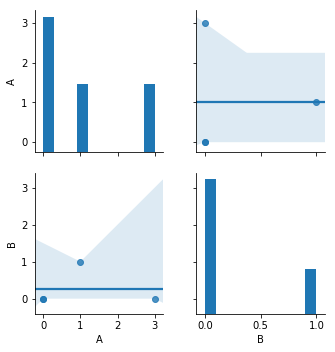

In [51]:
numeric_summary(df,output,deciles=False)

In [52]:
df = pd.read_csv('Heart.csv')
df.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [53]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

,feature,data_type,min_digits,max_digits,row_count,notnull_count,distinct_count,top_values,top_freqs,min,...,max,mean,std,lower_95_ci,upper_95_ci,sum,missing_rate,zero_rate,pos_rate,neg_rate
Age,Age,int64,4,4,303,303,41,"[58.0, 57.0, 54.0, 59.0]","[19, 17, 16, 14]",29.0,...,77.0,54.438944,9.038662,53.421199,55.456689,16495.0,0.000000,0.000000,1.000000,0.0
Sex,Sex,int64,3,3,303,303,2,"[1.0, 0.0]","[206, 97]",0.0,...,1.0,0.679868,0.467299,0.627251,0.732485,206.0,0.000000,0.320132,0.679868,0.0
RestBP,RestBP,int64,4,5,303,303,50,"[120.0, 130.0, 140.0, 110.0]","[37, 36, 32, 19]",94.0,...,200.0,131.689769,17.599748,129.708054,133.671484,39902.0,0.000000,0.000000,1.000000,0.0
Chol,Chol,int64,5,5,303,303,152,"[234.0, 204.0, 197.0, 269.0]","[6, 6, 6, 5]",126.0,...,564.0,246.693069,51.776918,240.863037,252.523101,74748.0,0.000000,0.000000,1.000000,0.0
Fbs,Fbs,int64,3,3,303,303,2,"[0.0, 1.0]","[258, 45]",0.0,...,1.0,0.148515,0.356198,0.108407,0.188622,45.0,0.000000,0.851485,0.148515,0.0
RestECG,RestECG,int64,3,3,303,303,3,"[0.0, 2.0, 1.0]","[151, 148, 4]",0.0,...,2.0,0.990099,0.994971,0.878066,1.102132,300.0,0.000000,0.498350,0.501650,0.0
MaxHR,MaxHR,int64,4,5,303,303,91,"[162.0, 160.0, 163.0, 152.0]","[11, 9, 9, 8]",71.0,...,202.0,149.607261,22.875003,147.031557,152.182965,45331.0,0.000000,0.000000,1.000000,0.0
ExAng,ExAng,int64,3,3,303,303,2,"[0.0, 1.0]","[204, 99]",0.0,...,1.0,0.326733,0.469794,0.273834,0.379631,99.0,0.000000,0.673267,0.326733,0.0
Oldpeak,Oldpeak,float64,3,3,303,303,40,"[0.0, 1.2, 1.0, 0.6]","[99, 17, 14, 14]",0.0,...,6.2,1.039604,1.161075,0.908868,1.170340,315.0,0.000000,0.326733,0.673267,0.0
Slope,Slope,int64,3,3,303,303,3,"[1.0, 2.0, 3.0]","[142, 140, 21]",1.0,...,3.0,1.600660,0.616226,1.531274,1.670047,485.0,0.000000,0.000000,1.000000,0.0


<Figure size 432x288 with 0 Axes>

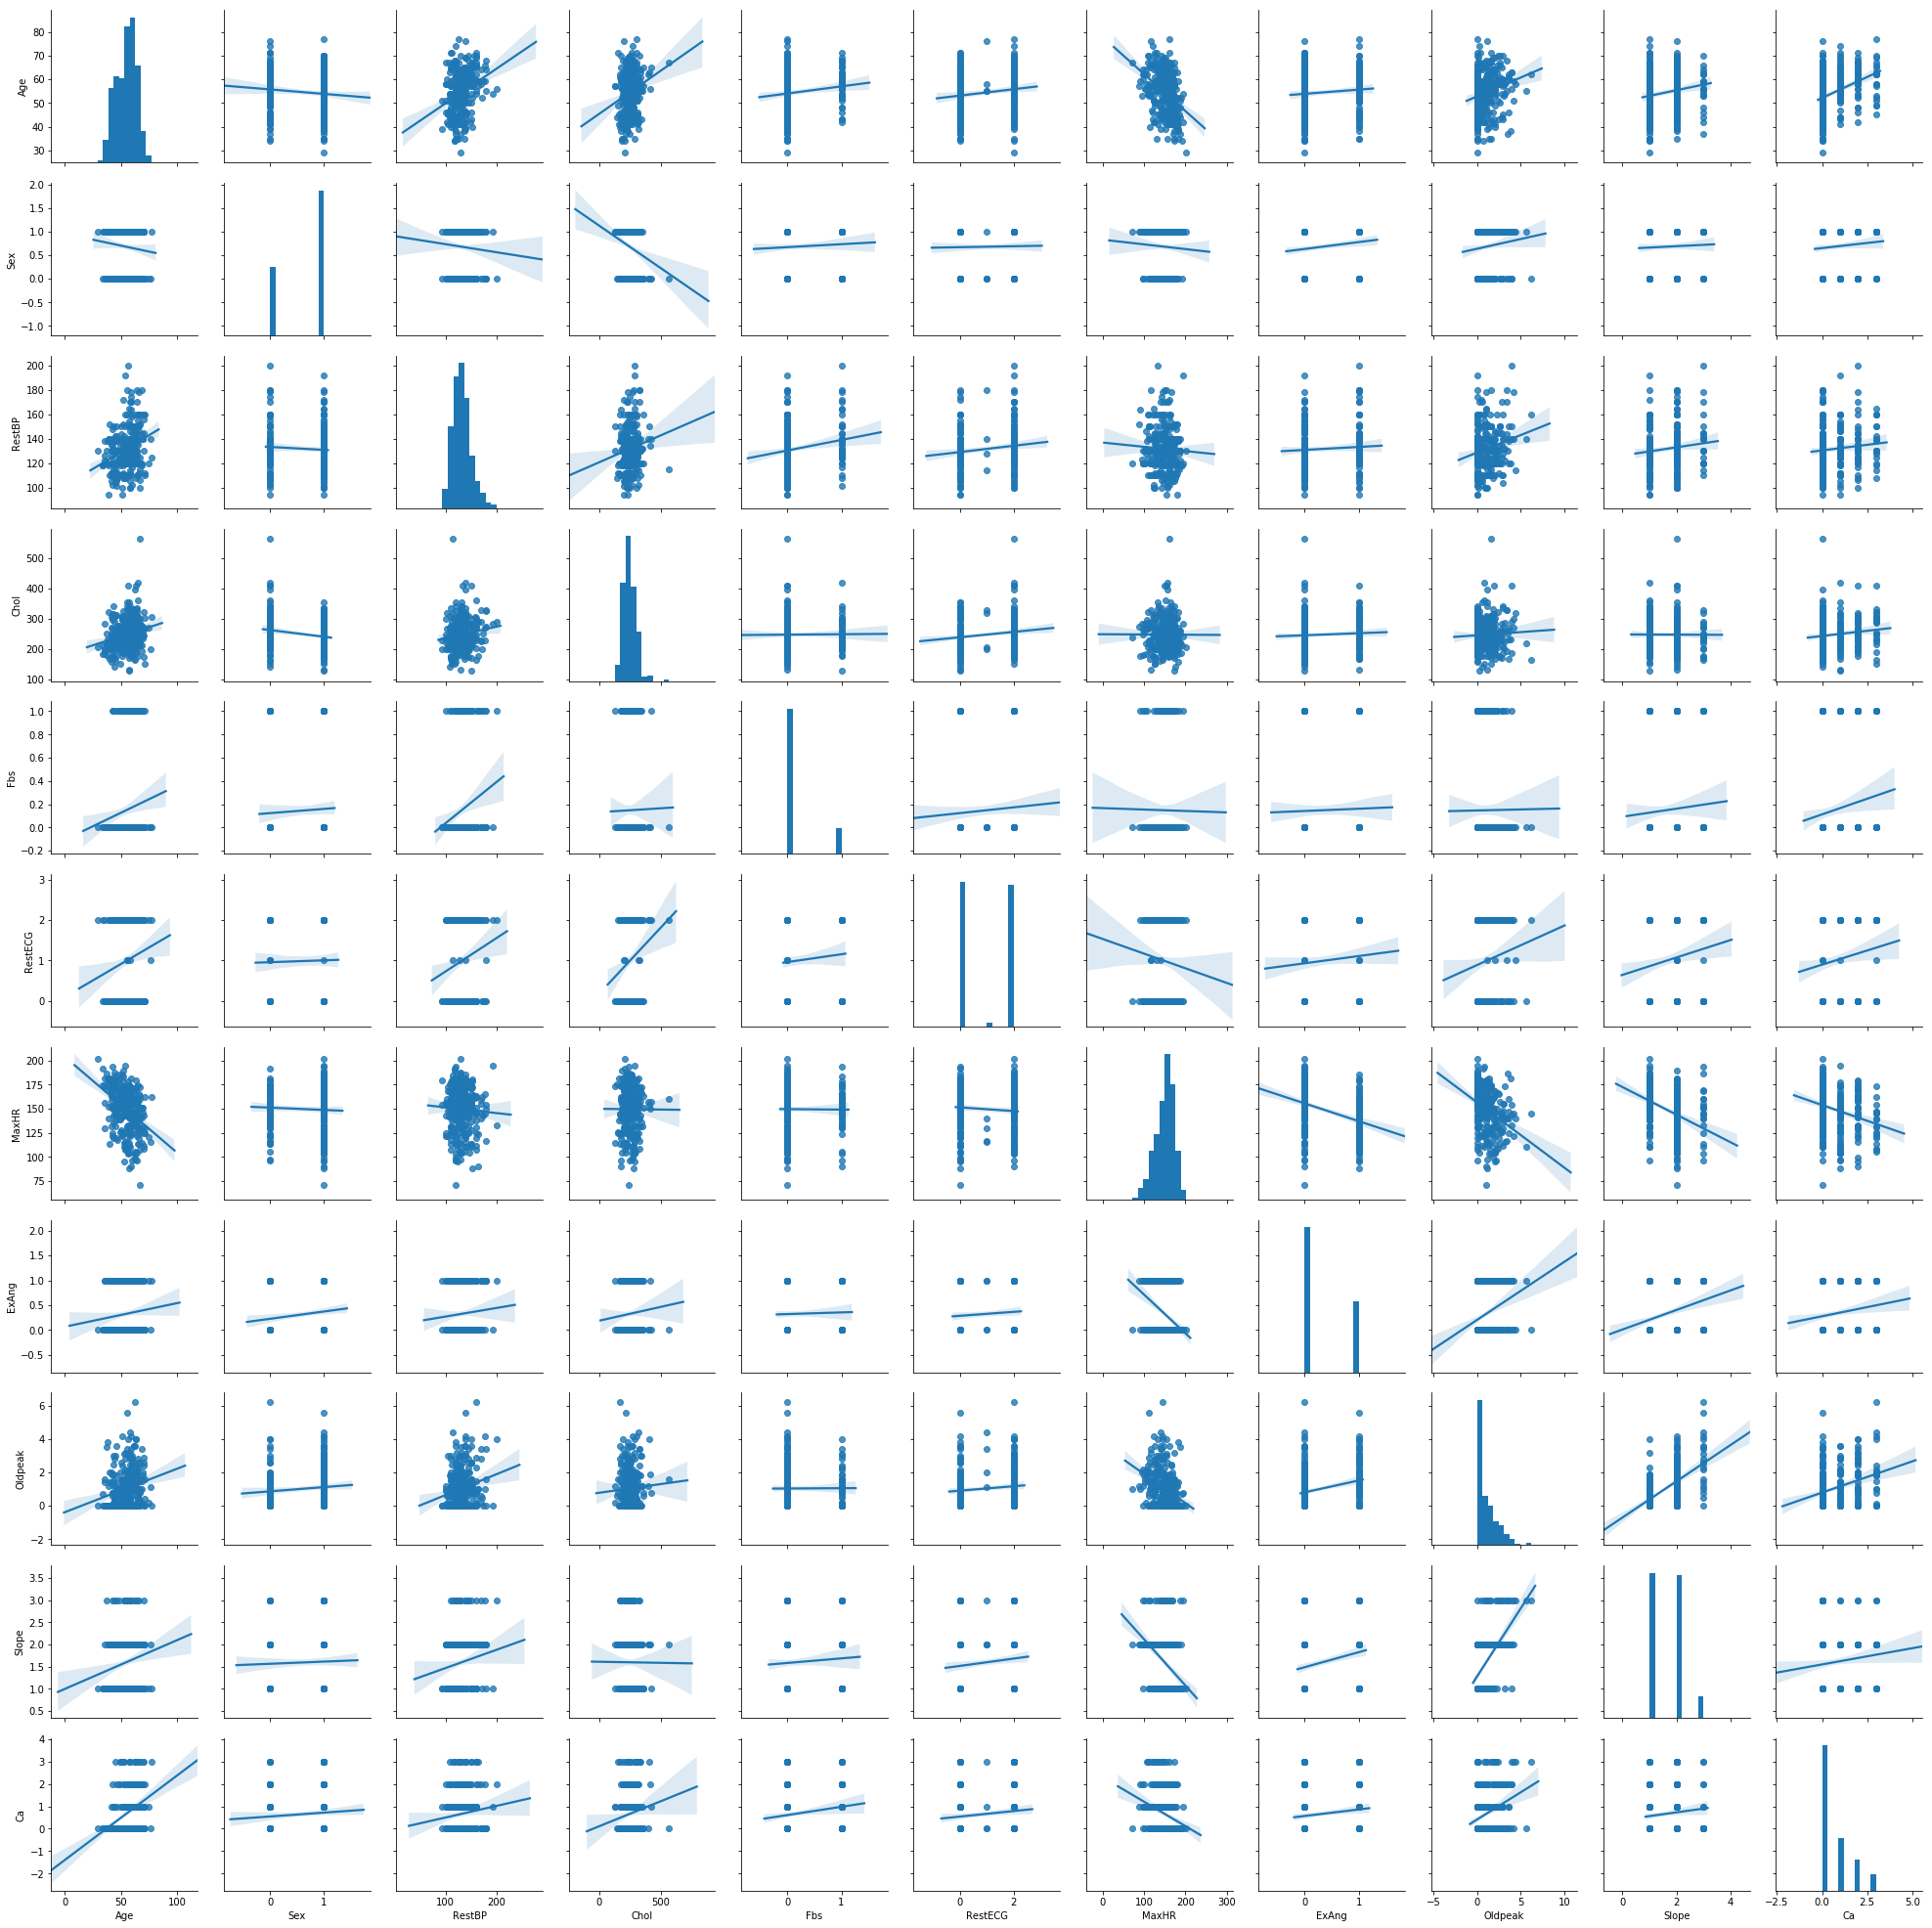

In [54]:
numeric_summary(df,output,deciles=False)